In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [2]:
data= pd.read_csv('bank-full.csv', sep=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# EDA

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.shape


(45211, 17)

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
data.duplicated().sum()

0

In [9]:
df=data.copy()

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

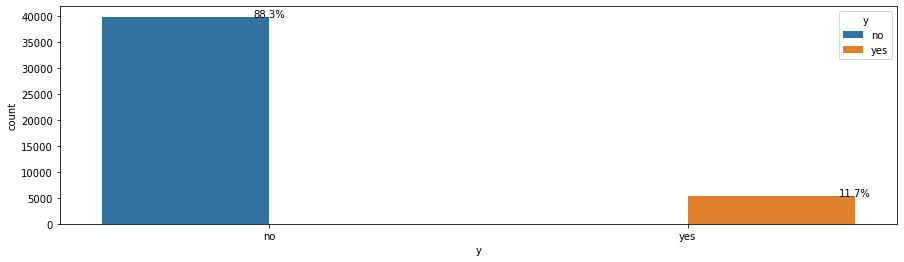

In [14]:
#y count
plt.figure(figsize=(15,4))
ax = sns.countplot(x="y", hue="y", data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

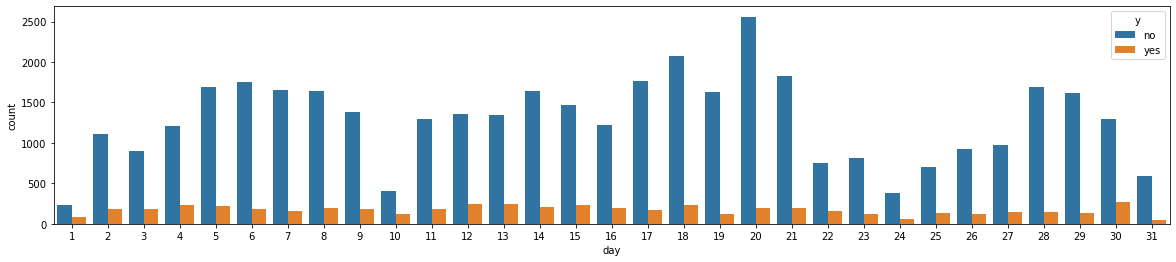

In [15]:
#realtionship of y with days
plt.figure(figsize=(20,4))
sns.countplot(data=df, x="day", hue="y")
plt.show()

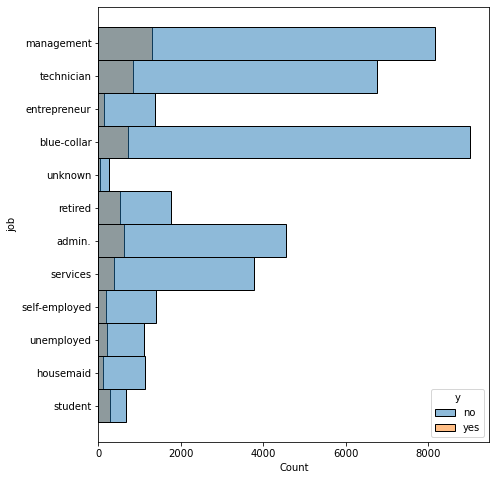

In [16]:
#relationship with job with y 
plt.figure(figsize=(7,8))
sns.histplot(data=df, y="job", hue="y")
plt.show()

In [17]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


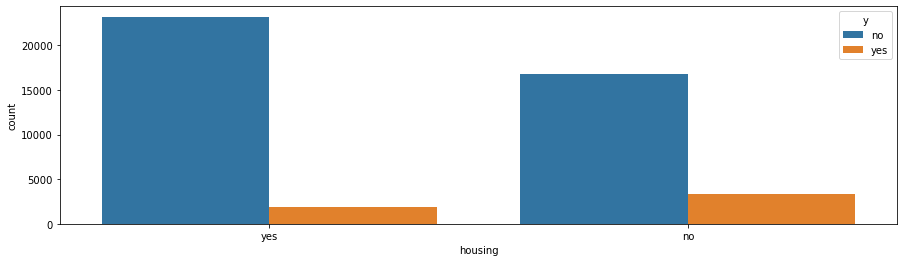

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="housing", hue="y")
plt.show()

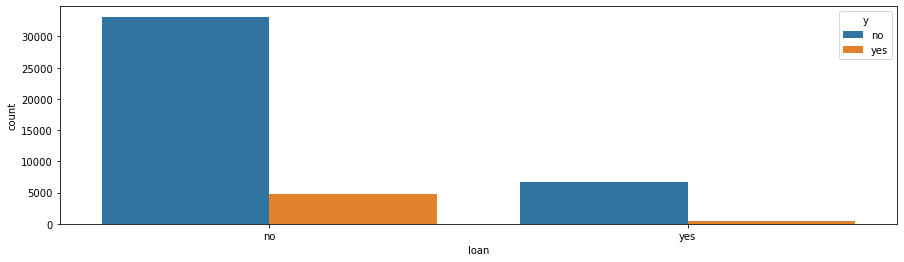

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="loan", hue="y")
plt.show()

In [20]:
df.duration.value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

<AxesSubplot:ylabel='duration'>

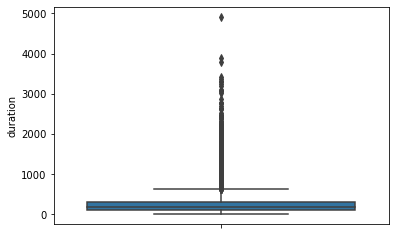

In [21]:
sns.boxplot(y='duration', data=df )

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [23]:
lr_duration, up_duration = remove_outlier(df['duration'])

In [24]:
df['duration'] = np.where(df['duration'] > up_duration, up_duration,df['duration'])
df['duration'] = np.where(df['duration'] < lr_duration, lr_duration,df['duration'])

<function matplotlib.pyplot.show(close=None, block=None)>

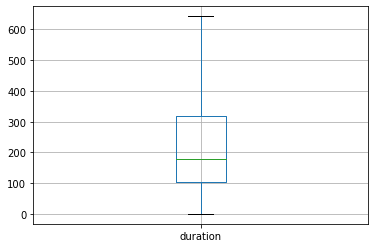

In [25]:
df.boxplot(column=["duration"])
plt.show

<AxesSubplot:ylabel='balance'>

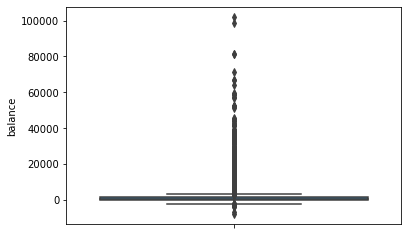

In [26]:
sns.boxplot(y="balance", data=df)

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [28]:
lr_bal, up_bal = remove_outlier(df['balance'])

In [29]:
df['balance'] = np.where(df['balance'] > up_bal, up_bal,df['balance'])
df['balance'] = np.where(df['balance'] < lr_bal, lr_bal,df['balance'])

<function matplotlib.pyplot.show(close=None, block=None)>

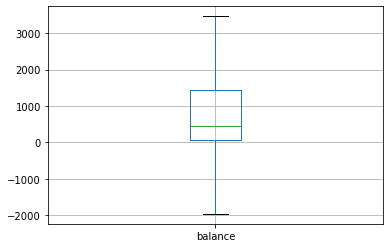

In [30]:
df.boxplot(column=["balance"])
plt.show

<AxesSubplot:ylabel='age'>

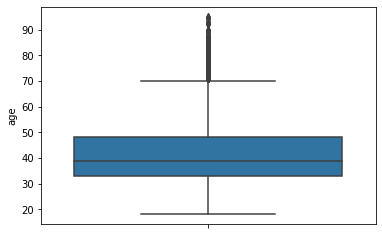

In [31]:
sns.boxplot(y="age", data=df)

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [33]:
lr_age, up_age = remove_outlier(df['age'])

In [34]:
df['age'] = np.where(df['age'] > up_age, up_age,df['age'])
df['age'] = np.where(df['age'] < lr_age, lr_age,df['age'])

<function matplotlib.pyplot.show(close=None, block=None)>

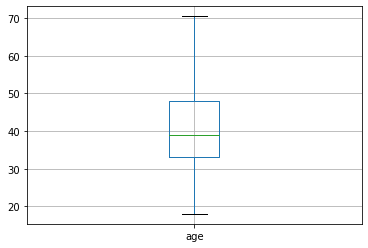

In [35]:
df.boxplot(column=["age"])
plt.show

In [36]:
from sklearn import preprocessing
housing = preprocessing.LabelEncoder()
df['housing'] = housing.fit_transform(df['housing'])
loan = preprocessing.LabelEncoder()
df['loan'] = loan.fit_transform(df['loan'])
marital= preprocessing.LabelEncoder()
df['marital'] = marital.fit_transform(df['marital'])
y= preprocessing.LabelEncoder()
df['y'] = y.fit_transform(df['y'])
default= preprocessing.LabelEncoder()
df['default'] = default.fit_transform(df['default'])

In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,1,tertiary,0,2143.0,1,0,unknown,5,may,261.0,1,-1,0,unknown,0
1,44.0,technician,2,secondary,0,29.0,1,0,unknown,5,may,151.0,1,-1,0,unknown,0
2,33.0,entrepreneur,1,secondary,0,2.0,1,1,unknown,5,may,76.0,1,-1,0,unknown,0
3,47.0,blue-collar,1,unknown,0,1506.0,1,0,unknown,5,may,92.0,1,-1,0,unknown,0
4,33.0,unknown,2,unknown,0,1.0,0,0,unknown,5,may,198.0,1,-1,0,unknown,0


In [38]:
df = df.drop(["contact","day","month","campaign","previous","pdays","poutcome"], axis=1)

<AxesSubplot:>

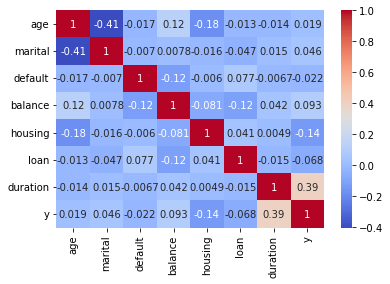

In [39]:
corr=df.corr()
sns.heatmap(corr, annot= True, cmap="coolwarm")

In [40]:

df = pd.get_dummies(df, columns=['job'],drop_first=True)
df = pd.get_dummies(df, columns=['education'],drop_first=True)

In [41]:
x = df.drop(['y'],axis =1).values
y = df['y'].values

In [42]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [43]:
import imblearn

In [44]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x,y)


In [45]:

print(x_over.shape, y_over.shape)
print(x.shape, y.shape)

(79844, 21) (79844,)
(45211, 21) (45211,)


In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x_over)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_scaler,y_over, test_size=0.2, random_state=11)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [49]:

# Logistic Regression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr_train = logit.predict(x_train)
y_pred_lr_test = logit.predict(x_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Train score of Logistic Regression: ",accuracy_lr_train)
print("Test score of Logistic Regression : ",accuracy_lr_test)
print('************************************************************')

# DecisionTree
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt_test = dt.predict(x_test)
y_pred_dt_train = dt.predict(x_train)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Train score of Decision Tree: ",accuracy_dt_train)
print("Test score of Decision Tree: ",accuracy_dt_test)
print('************************************************************')

# RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Train score of Random Forest : ",accuracy_rf_train)
print("Test score of Random Forest: ",accuracy_rf_test)
print('************************************************************')

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn_test = knn.predict(x_test)
y_pred_knn_train = knn.predict(x_train)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Train score of Knn : ",accuracy_knn_train)
print("Test score of Knn: ",accuracy_knn_test)
print('************************************************************')






Train score :  0.7776281800391389
Test score :  0.7807627277850836
************************************************************
Train score :  0.9995772994129158
Test score :  0.9477111904314609
************************************************************
Train score :  0.9995772994129158
Test score :  0.9609869121422756
************************************************************
Train score :  0.9162270058708415
Test score :  0.8822719018097565
************************************************************
